In [55]:
import pandas 

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_nearest_neighbors(plate_mjd_fiber, ngbs_df, n_ngbs = 10 , plot_spectra = False):
    df_size = ngbs_df.shape[1]
    n_ngbs = min(df_size, n_ngbs)
    columns = [str(i) for i in range(n_ngbs)]
    
    for c in columns:
        plate, mjd, fiber = ngbs_df[c].loc[plate_mjd_fiber].split('-')
        print('http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate='+plate+
                                                                          '&mjd='+mjd+
                                                                          '&fiber=' + fiber)
        if plot_spectra:
            plate_mjd_fiber_ngb = plate + '-' + mjd + '-' + fiber
            dr14_specobjid = ngbs_df['SpeccObjID'].loc[plate_mjd_fiber_ngb]
            plt.figure(figsize = (17,15))
            plt.imshow(mpimg.imread('http://skyserver.sdss.org/dr14/en/get/SpecById.ashx?id=' + dr14_specobjid))
            plt.show()
    return

In [64]:
### Need to unzip the nearest neighbors data
#!tar -zxvf ERT_neighbors_DF.tar.gz

#### The entries in the table are 'plate-mjd-fiber', the columns represent the nearest neighbor rank. This ranking is based on ERT similarity, see (...) for description and (https://github.com/ireis/ERT-similarity) for code

In [58]:
ERT_neighbors_DF = pandas.read_csv('ERT_neighbors_DF.csv', index_col=0)
ERT_neighbors_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,SpeccObjID
1463-53063-29,1463-53063-29,6682-56390-18,5009-55707-602,4693-55632-462,4456-55537-218,6035-56076-142,3878-55361-98,4402-55514-322,3808-55513-198,5411-55953-228,...,5981-56340-666,5992-56066-676,6638-56370-778,5440-55983-404,4763-55869-496,5183-55976-602,5786-56251-422,6432-56309-792,4703-55617-604,1647199586558699520
731-52460-327,731-52460-327,4866-55895-366,4831-55679-796,4342-55531-508,7653-57306-125,5190-56077-660,7114-56748-216,5386-56008-778,5427-56001-177,4321-55504-305,...,4456-55537-780,6197-56191-592,6130-56214-225,3937-55352-306,6282-56572-762,4966-55712-398,4648-55673-340,3856-55269-21,5371-55976-856,823122758249506816
556-51991-242,556-51991-242,556-51991-244,6197-56191-467,4602-55644-665,4182-55446-447,5738-56002-318,4387-55534-49,5389-55953-271,4049-55591-390,5739-55976-885,...,6723-56428-474,6429-56274-858,6660-56370-246,6161-56238-734,2215-53793-277,7087-56637-316,6982-56444-371,7166-56602-824,5776-56010-782,626066902061443072
294-51986-184,294-51986-184,2238-54205-136,4464-55866-558,4011-55635-715,5396-55947-566,3936-55302-228,5407-55926-340,4220-55447-562,6722-56431-775,4347-55830-94,...,7160-56599-610,6713-56402-748,5193-56066-352,6023-56069-188,7163-56593-425,7687-57007-752,5373-56010-16,5013-55723-691,3762-55507-864,331065183466186752
851-52376-466,851-52376-466,4443-55539-472,6457-56330-850,5034-56190-642,3836-55302-635,3680-55210-718,4855-55926-236,8862-57461-686,4777-55707-774,6709-56429-344,...,6121-56187-359,5399-55956-355,3758-55506-808,6025-56098-879,6449-56356-820,4805-55715-970,5307-55998-198,4885-55735-75,4793-55648-81,958268953690400768


# Example for retrieving quasars with similar spectra
## plate-mjd-fiber = 6464-56309-524 is an Extremely Red Quasar (ERQ) (see https://ui.adsabs.harvard.edu/?#abs/2017MNRAS.464.3431H)
### We retrieve its nearest neighbors and get objects with similar spectra, which can be ERQ candidates

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=6464&mjd=56309&fiber=524


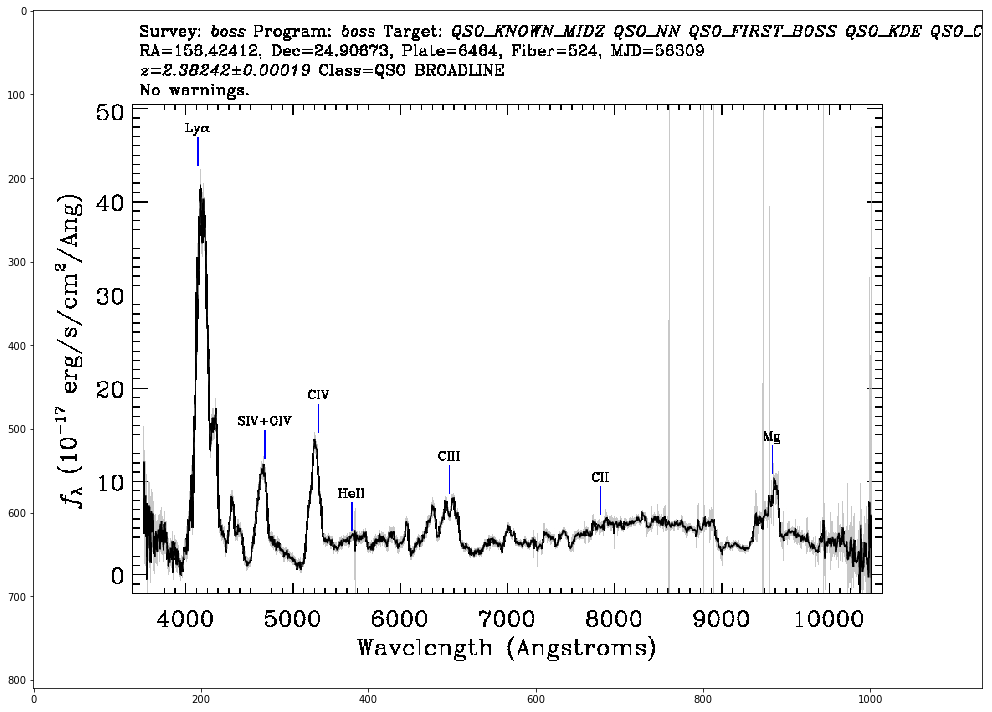

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=7291&mjd=56992&fiber=692


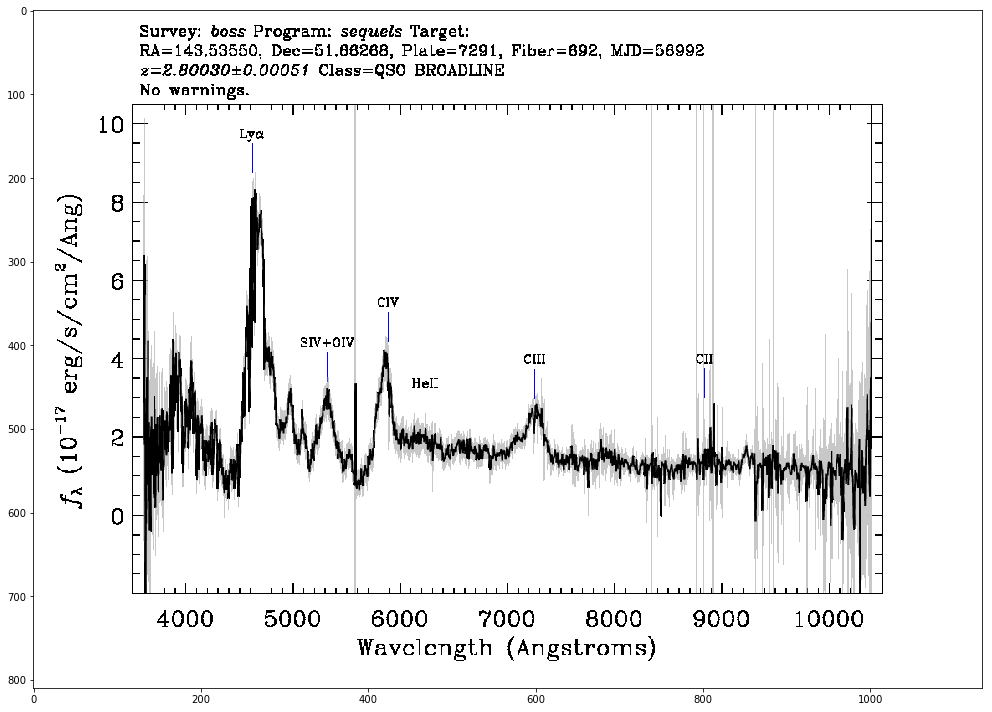

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=4851&mjd=55680&fiber=566


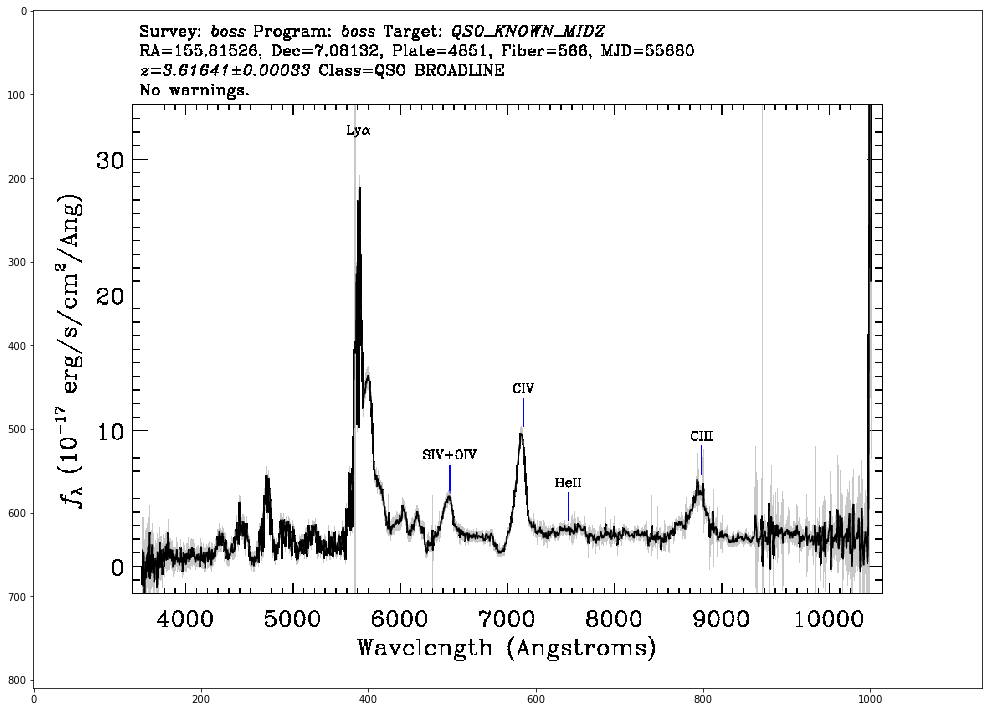

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=3806&mjd=55505&fiber=208


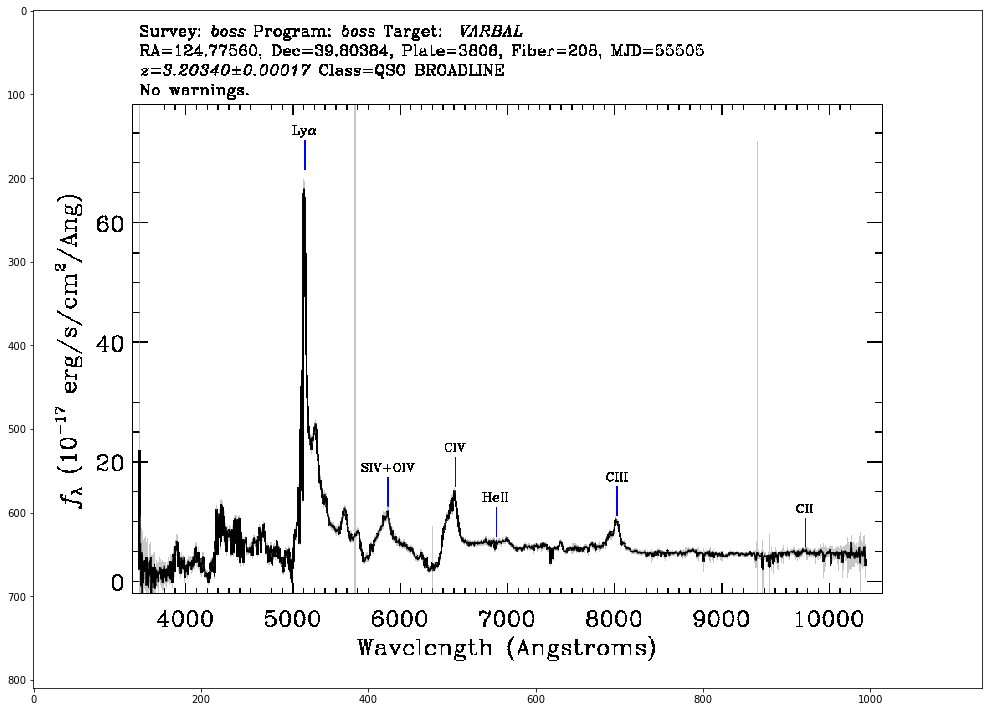

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=4177&mjd=55688&fiber=528


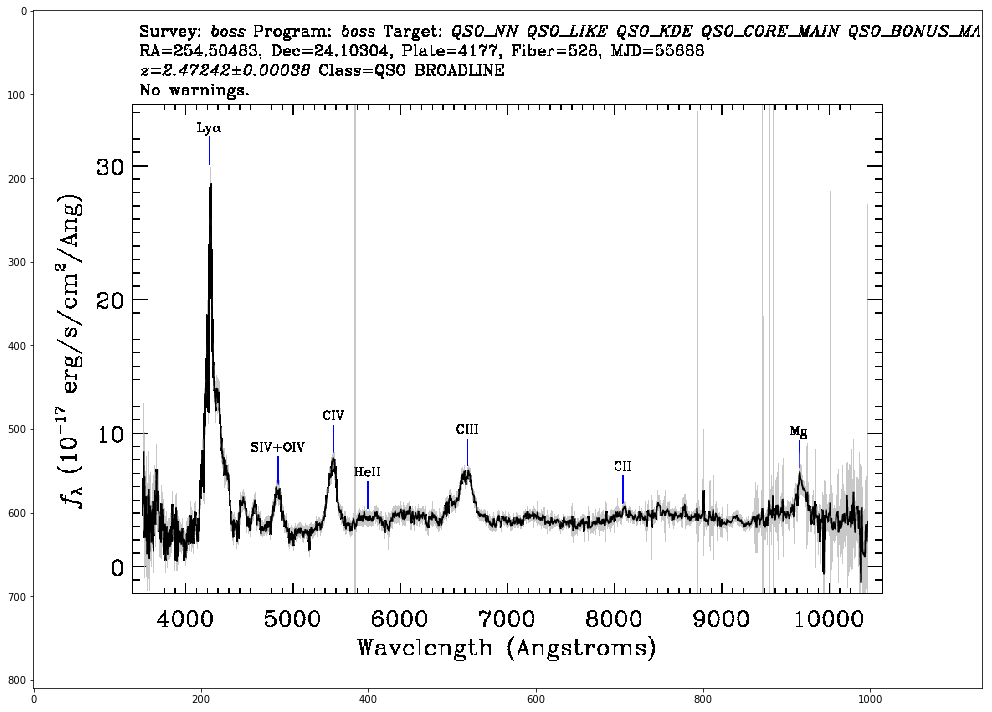

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=4860&mjd=55691&fiber=772


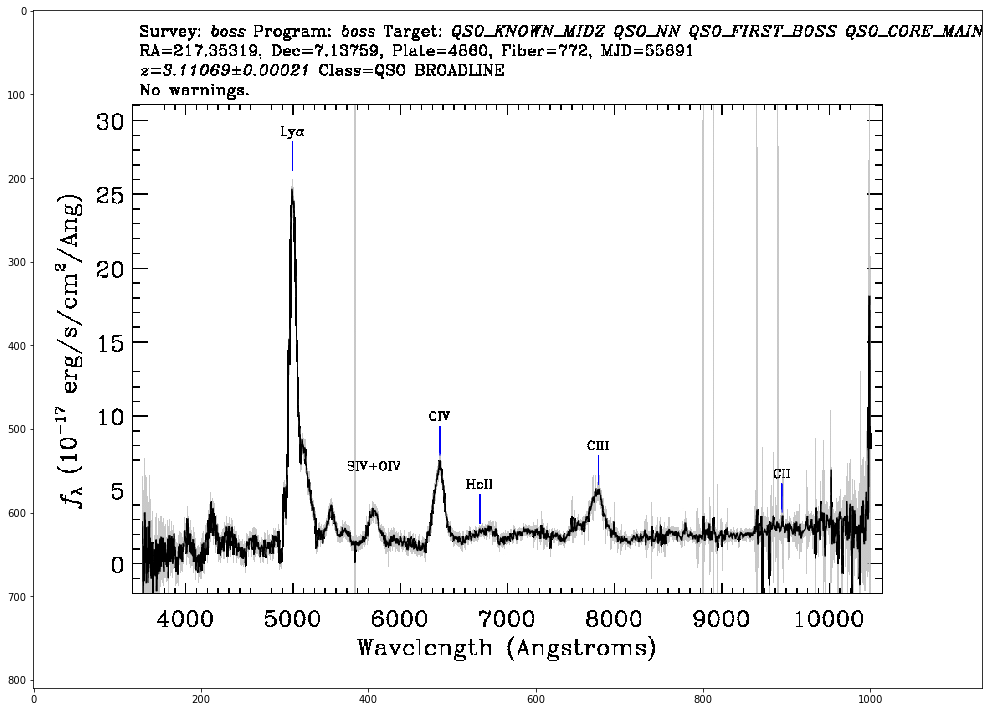

In [59]:
get_nearest_neighbors('6464-56309-524', ERT_neighbors_DF, 6, plot_spectra=True)

In [60]:
get_nearest_neighbors('6464-56309-524', ERT_neighbors_DF, 6, plot_spectra=False)

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=6464&mjd=56309&fiber=524
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=7291&mjd=56992&fiber=692
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=4851&mjd=55680&fiber=566
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=3806&mjd=55505&fiber=208
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=4177&mjd=55688&fiber=528
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?plate=4860&mjd=55691&fiber=772
